# Logistische Regression lernt mit Maximum-Likelihood


## Lernziele

```{admonition} Lernziele
:class: important
* Sie kennen die Begriffe **Fehlermaß**, **Kostenfunktion** und **Verlustfunktion**.
```

## Wir basteln eine Kostenfunktion

Bei der linearen Regression werden die prognostizierten Daten $\hat{y}$ mit den
echten Daten $y$ verglichen. Dazu wird der Abstand der beiden Werte berechnet
und quadriert, damit der Fehler immer positiv ist. Zuletzt wird der Mittelwert
aller Fehler für alle Trainingsdaten gebildet. Die Gewichte des linearen
Regressionsmodells werden dann so berechnet, dass die mittlere Summe der
Fehlerquadrate möglichst klein, also minimiert wird. In der Wirtschaft
verursachen Fehler Kosten. Daher wird ein **Fehlermaß**, in der ML Community
auch **Kostenfunktion (cost function)** genannt. Da das Fehlermaß bzw. die
Kostenfunktion minimiert werden soll, sprechen mache auch von **Verlustfunktion
(loss function)**. 

So ein Maß, egal wie wir es am Ende nennen, brauchen wir hier auch. Wir müssen
beurteilen können, ob die gewählten Gewichte gut oder schlecht sind, also kleine
Fehler oder große Fehler produzieren. Nur passt diesmal leider die kleinste
Summe der Fehlerquadrate nicht. Bei der binären Klassifikation gibt es nämlich
nur zwei Fehler. Entweder, ich prognostiziere Klasse 1, aber es wäre Klasse 0
gewesen. Oder ich prognostiziere *nicht* Klasse 1, obwohl Klasse 1 richtig
gewesen wäre. Damit haben wir auch zwei Fehlerarten. Für beide Fehlerarten
führen wir ein eigenes Fehlermaß bzw. Kostenfunktion bzw. Verlustfunktion ein.

Damit wir uns bei den folgenden Überlegungen etwas Schreibarbeit sparen können,
kürzen wir die gewichtete Summe mit $z$ ab, also

$$z = \sum_{i=0}^{N} x_i \omega_i.$$

### Kostenfunktion, wenn Klasse 1 richtig wäre

$\sigma(z)$ gibt die Wahrscheinlichkeit an, dass der prognostizierte Output
$\hat{y}$ in Klasse 1 einsortiert werden sollte. Wenn das richtig ist, also
tatsächlich für den echten Output $y=1$ gilt, dann ist der Fehler bzw. sind die
Kosten 0. Sollte jedoch das logistische Regressionsmodell $\sigma(z)$ fehlerhaft
Richtung 0 tendieren, so sollten auch hohe Kosten anfallen. Die Kostenfunktion
muss also stark steigen, je mehr sich die Wahrscheinlichkeit
$\sigma(z)$ der 0 nähert.

Es gibt einige Funktionen, die ein solches Verhalten beschreiben. Wir verwenden
die folgende Kostenfunktion:

$$c_{1}(z) = 
- \log\left(\sigma(z)\right), \quad \text{ falls } y=1.$$

Vielleicht mag man sich jetzt wundern, wie man auf diese Funktion kommt. Diese
Funktion wie auch die nachfolgenden Überlegungen basieren auf der
[Maximum-Likelihood-Methode](https://de.wikipedia.org/wiki/Maximum-Likelihood-Methode),
einem sehr bekannten statistischen Verfahren.

Am einfachsten ist es wahrscheinlich, sich den Graph der Funktion anzusehen. Da
$\sigma(z)$ für jede Kombination von Inputs $x_i$ und Gewichten $\omega_i$
zwischen 0 und 1 liegt, brauchen wir die Kostenfunktion $c_1$ auch nur auf dem
Intervall $[0, 1]$ plotten.

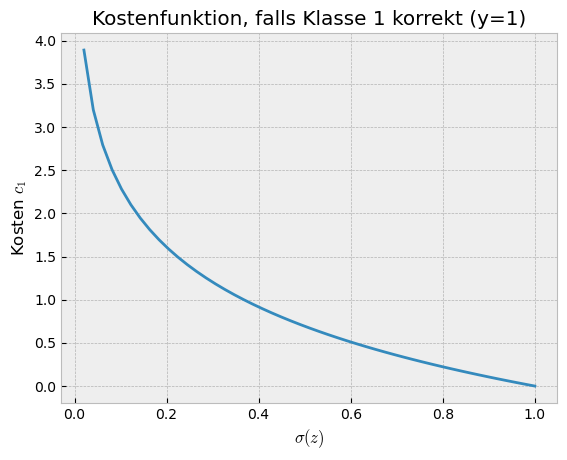

In [1]:
import matplotlib.pylab as plt; plt.style.use('bmh')
import numpy as np

sigma_z = np.linspace(0, 1)[1:]
cost_1 = - np.log(sigma_z)

fig, ax = plt.subplots()
ax.plot(sigma_z,cost_1)
ax.set_xlabel(r'$\sigma(z)$')
ax.set_ylabel(r'Kosten $c_1$')
ax.set_title('Kostenfunktion, falls Klasse 1 korrekt (y=1)');

### Kostenfunktion, wenn Klasse 1 nicht richtig wäre

Nun betrachten wir den zweiten Fall. Der echte Output soll nicht der Klasse 1
angehören, also $y=0$. Sollte die Wahrscheinlichkeit des logistischen
Regressionsmodells $\sigma(z)$ in Richtung 0 gehen, so sollen kaum Kosten
anfallen. Falls korrekterweise die Wahrscheinlicheit 0 ist, so sollen gar keine
Kosten anfallen, denn der Fehler geht gegen 0. Und umgekehrt, wenn die
Wahrscheinlichkeit des logistischen Regressionsmodells Richtung 1 tendiert, so
sollen die Kosten stark steigen. Wir nehmen als zweite Kostenfunktion für den
Fall $y=0$ die folgende Funktion:

$$c_{0}(z) = - \log\left(1-\sigma(z)\right), \quad \text{ falls } y=0.$$

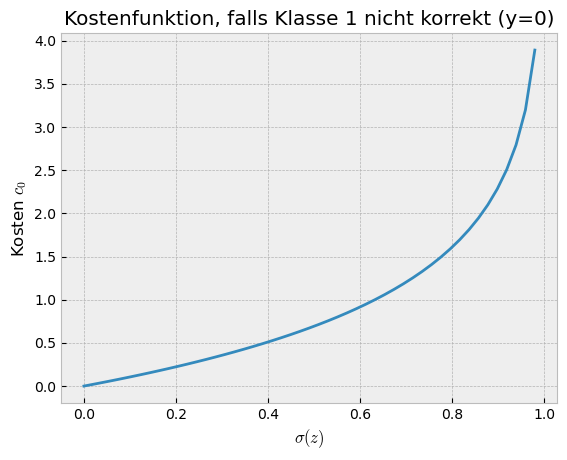

In [2]:
sigma_z = np.linspace(0, 1)[:-1]
cost_0 = - np.log(1 - sigma_z)

fig, ax = plt.subplots()
ax.plot(sigma_z,cost_0)
ax.set_xlabel(r'$\sigma(z)$')
ax.set_ylabel(r'Kosten $c_0$')
ax.set_title('Kostenfunktion, falls Klasse 1 nicht korrekt (y=0)');

### Beide Kostenfunktionen kombiniert

Zusammengefasst haben wir also zwei Kostenfunktionen für die beiden Fälle.

$$ 
c(z) = 
\begin{cases} 
c_{0}(z): & y = 0 \\
c_{1}(z): & y = 1 \\
\end{cases} \qquad = \qquad 
\begin{cases} 
- \log\left(1-\sigma(z)\right): & y = 0 \\
- \log\left(\sigma(z)\right): & y = 1 \\
\end{cases}.
$$

Es wäre besser, die Fallunterscheidung weglassen zu können und nur eine
Kostenfunktion zu betrachten. Dafür gibt es einen bekannten Trick, die
sogenannte *Konvexkombination* beider Funktionen funktioniert:

$$
c(z) = y\cdot c_{1}(z) + (1-y) c_{0}(z).
$$

Wenn wir einmal $y=0$ einsetzen und einmal $y=1$, so sehen wir, dass entweder
$c_{1}(z)$ oder aber $c_{0}(z)$ übrig bleibt — so wie gewünscht.

Also lautet die konvex kombiniert Kostenfunktion für einen einzelnen
Trainingsdatensatz mit den Inputs $x_i$ und den Gewichten $\omega_i$

$$ c(\mathbf{x}; \boldsymbol{\omega}) = - y\cdot
\log\left(\sigma\left(\sum_{i=0}^{N}x_i \omega_i\right)\right) - (1-y)
\log\left(\sigma\left(1-\sum_{i=0}^{N}x_i \omega_i\right)\right) $$

mit der logistischen Funktion $\sigma(z) = \frac{1}{1+e^{-z}}$.

## Lernregel für die logistische Regression

Wie bei der linearen Regression wird nun die Kostenfunktion für jeden einzelnen Trainingsdatensatz berechnet und anschließend wird über alle Kosten der Mittelwert gebildet. Nun müssen die Gewichte so gewähle werden, dass der Mittelwert der Kosten minimiert wird. Anders als bei der linearen Regression kann dafür nicht einfach eine Gleichgun gelöst werden, die die Gewichte berechnet. Stattdessen muss wie beim Pereptron ein iteratives Verfahren verwendet werden. Damit ist gemeint, dass mit zufällig gewählten Gewichten die mittleren Kosten berechnet werden. Danach wird solange an den Gewichten gedreht, bis ein Minumum der mittleren Kosten erreicht wird. Wie an den Gewichten gedreht wird, gibt der **Gradient der Kostenfunktion** vor.

In dieser Vorlesung gehen wir *nicht* auf das sehr mathematiklastige Thema Gradientenverfahren ein. Der KI-Campus bietet einen spielerischen Zugang zu dem Thema mit weiterführenden Texten an: [https://learn.ki-campus.org](https://learn.ki-campus.org/courses/explorables-schule-imaginary2021/items/7H9nZI186JgjC8jOjxdbaT) (eine Anmeldung ist dafür erforderlich, aber kostenfrei).